In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy import stats 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
#path to uber csv 

file="uber.csv"

#read into data
uber_df= pd.read_csv(file)
uber_df=uber_df.head(1000)


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

pickup_lats=uber_df["pickup_latitude"]
pickup_lngs=uber_df["pickup_longitude"]
#lat_lngs=zip(pickup_lats,pickup_lngs)

uber_df["City"]="x"

for index, row in uber_df.iterrows():
    city=citipy.nearest_city(row["pickup_latitude"],row["pickup_longitude"]).city_name
    uber_df.loc[index,"City"]=city  
       
# Print the city count to confirm sufficient count
len(cities)
uber_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,new york
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,new york
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,new york
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,guttenberg
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,new york
...,...,...,...,...,...,...,...,...,...,...
995,13439193,2011-05-04 06:39:00.00000044,5.7,2011-05-04 06:39:00 UTC,-73.969720,40.757577,-73.953782,40.766960,1,guttenberg
996,32405310,2011-11-23 20:43:20.0000002,8.1,2011-11-23 20:43:20 UTC,-73.993784,40.757054,-73.980018,40.775632,3,weehawken
997,51612001,2010-01-11 20:58:00.00000035,8.5,2010-01-11 20:58:00 UTC,-73.972338,40.765078,-73.954527,40.783833,5,guttenberg
998,937243,2013-06-12 17:01:24.0000001,5.5,2013-06-12 17:01:24 UTC,-73.979054,40.784730,-73.982970,40.775048,1,guttenberg


In [4]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


In [5]:
#distance 

dropoff_lats=uber_df["pickup_longitude"]
dropoff_lngs=uber_df["pickup_longitude"]

uber_df["Distance"]=0

for index, row in uber_df.iterrows():
    distance=haversine(row["pickup_latitude"],row["pickup_longitude"],\
                       row["dropoff_latitude"], row["dropoff_longitude"],to_radians=True, earth_radius=6371)
    uber_df.loc[index,"Distance"]=distance  


In [6]:
#binning 

#set time of day bins
timeofday=[0, 5, 12, 17, 24]

uber_df.pickup_datetime= pd.to_datetime(uber_df.pickup_datetime)

#labels for bins
times=["Night","Morning","Afternoon","Evening"]

uber_df['Time of Day'] = pd.cut(uber_df.pickup_datetime.dt.hour, timeofday, labels=times, right=False)


In [7]:
#remove distance 0

uber_df_cleaned=uber_df.loc[uber_df["Distance"]!=0]

uber_df_cleaned

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City,Distance,Time of Day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,new york,1.683323,Evening
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,new york,2.457590,Evening
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,new york,5.036377,Evening
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,guttenberg,1.661683,Morning
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,new york,4.475450,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
995,13439193,2011-05-04 06:39:00.00000044,5.7,2011-05-04 06:39:00+00:00,-73.969720,40.757577,-73.953782,40.766960,1,guttenberg,1.700119,Morning
996,32405310,2011-11-23 20:43:20.0000002,8.1,2011-11-23 20:43:20+00:00,-73.993784,40.757054,-73.980018,40.775632,3,weehawken,2.368857,Evening
997,51612001,2010-01-11 20:58:00.00000035,8.5,2010-01-11 20:58:00+00:00,-73.972338,40.765078,-73.954527,40.783833,5,guttenberg,2.568764,Evening
998,937243,2013-06-12 17:01:24.0000001,5.5,2013-06-12 17:01:24+00:00,-73.979054,40.784730,-73.982970,40.775048,1,guttenberg,1.125950,Evening


In [8]:
# Most Popular Pick up times & how it correlates to price (plot, basic stats dataframe) -Neil 

# Rank by cities (fare amount paid, Total distances, Most popular time of day) -Rose 

# Where are the most popular pick up locations (map, dataframe) -Turgut 

# Price regression on number of passengers (plot, stats)- Neil 

# Where are the most popular drop off locations (map, dataframe) -Turgut

# Distance between pick up and drop off vs Price (basic stats, plot) -Daniel

In [9]:
# Distance Basic Stats - Daniel
uber_stats_df = pd.DataFrame({
    "Average Distance": [uber_df_cleaned["Distance"].mean()],
    "Total of Distances": [uber_df_cleaned["Distance"].sum()],
    "Number of Trips": [uber_df_cleaned["Distance"].count()],
    "Minimum Distance": [uber_df_cleaned["Distance"].min()],
    "Max Distance": [uber_df_cleaned["Distance"].max()]})

uber_stats_df.style.format({"Number of Unique Distances":"{:,.2f}",
                               "Average Distance":"{:,.2f}",
                               "Total of Distances":"{:,.2f}"})

,Average Distance,Total of Distances,Number of Trips,Minimum Distance,Max Distance
0,12.28,"11,981.39",976,0.000688,8666.398012


In [10]:
# Fare Amount Basic Stats - Daniel
uber_fare_dist_df = pd.DataFrame({
    "Average Fare Amount": [uber_df_cleaned["fare_amount"].mean()],
    "Total Fare Amounts": [uber_df_cleaned["fare_amount"].sum()],
    "Number of Trips": [uber_df_cleaned["fare_amount"].count()],
    "Minimum Fare Amount": [uber_df_cleaned["fare_amount"].min()],
    "Max Fare Amount": [uber_df_cleaned["fare_amount"].max()]})

uber_fare_dist_df.style.format({"Average Fare Amount":"${:,.2f}",
                               "Total Fare Amounts":"${:,.2f}",
                               "Minimum Fare Amount":"${:,.2f}"}                              )

,Average Fare Amount,Total Fare Amounts,Number of Trips,Minimum Fare Amount,Max Fare Amount
0,$11.10,"$10,833.41",976,$2.90,93.160000


In [14]:
# Identify the trip that has a distance over 8000 - Daniel
uber_df_cleaned[uber_df_cleaned['Distance'] > 8000]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City,Distance,Time of Day
346,25741482,2015-03-05 19:15:07.0000001,15.5,2015-03-05 19:15:07+00:00,0.0,0.0,-73.979805,40.78603,1,takoradi,8666.398012,Evening


In [40]:
# Filter dataframe with a Distance less than 8000 - Daniel
new_uber_df_cleaned = uber_df_cleaned[uber_df_cleaned['Distance'] < 8000]
new_uber_df_cleaned

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City,Distance,Time of Day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,new york,1.683323,Evening
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,new york,2.457590,Evening
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,new york,5.036377,Evening
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,guttenberg,1.661683,Morning
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,new york,4.475450,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
995,13439193,2011-05-04 06:39:00.00000044,5.7,2011-05-04 06:39:00+00:00,-73.969720,40.757577,-73.953782,40.766960,1,guttenberg,1.700119,Morning
996,32405310,2011-11-23 20:43:20.0000002,8.1,2011-11-23 20:43:20+00:00,-73.993784,40.757054,-73.980018,40.775632,3,weehawken,2.368857,Evening
997,51612001,2010-01-11 20:58:00.00000035,8.5,2010-01-11 20:58:00+00:00,-73.972338,40.765078,-73.954527,40.783833,5,guttenberg,2.568764,Evening
998,937243,2013-06-12 17:01:24.0000001,5.5,2013-06-12 17:01:24+00:00,-73.979054,40.784730,-73.982970,40.775048,1,guttenberg,1.125950,Evening


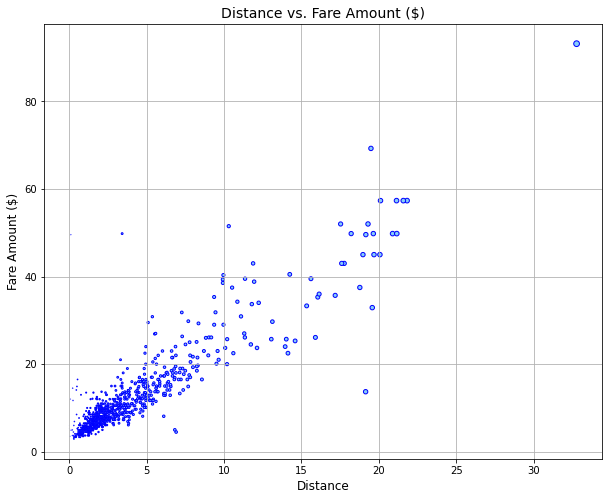

In [42]:
# Distance vs Price (plot) - Daniel
uber_fare = new_uber_df_cleaned['fare_amount']
uber_dist = new_uber_df_cleaned['Distance']

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(uber_dist, uber_fare, uber_dist, marker="o", facecolors="lightskyblue", edgecolors="blue")

# Assign to the plot, title, x label and y label
plt.title("Distance vs. Fare Amount ($)", fontsize=14)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.xlabel("Distance", fontsize=12)
plt.grid()

# Print plot
plt.show()

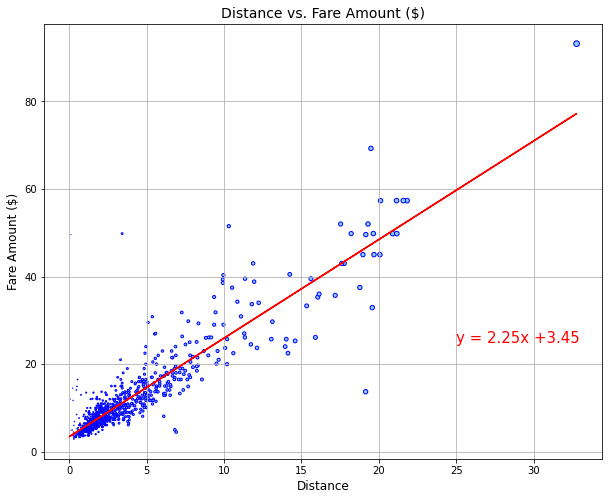

In [43]:
# Distance vs Price plot with Linear Regression - Daniel
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(uber_dist, uber_fare)
regress_values = uber_dist * slope + intercept

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(uber_dist, uber_fare, uber_dist, marker="o", facecolors="lightskyblue", edgecolors="blue")
plt.plot(uber_dist,regress_values,"r-")

# Assign to the plot, title, x label and y label
plt.title("Distance vs. Fare Amount ($)", fontsize=14)
plt.xlabel("Distance", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.grid()
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Print plot
plt.show()